In [7]:
from functools import partial
from pathlib import Path

from matplotlib.pyplot import plot  # type: ignore
from torch import manual_seed  # type: ignore

from karpathy_series.makemore.bigrams import TriGram
from karpathy_series.makemore.data import read_data
from karpathy_series.makemore.encoding.character import BiCharacterEncoder, CharacterEncoder, CharacterSet
from karpathy_series.makemore.components.generation import TriGramNetGenerator
from karpathy_series.makemore.components.networks.linear import LinearNetwork
from karpathy_series.makemore.components.function.loss import CrossEntropyLoss
from karpathy_series.makemore.components.models.model import NetModel
from karpathy_series.makemore.training.data import TrainingSequencer, TrainingSequence
from karpathy_series.makemore.training.learning import Learner

%matplotlib inline
seed_gen = manual_seed(2147483647)  # type: ignore

In [5]:
data_path = Path("../../data/names.txt")
words = read_data(data_path)
char_set = CharacterSet.from_words(words)
char_encoder = CharacterEncoder.from_charset(char_set)
bi_char_encoder = BiCharacterEncoder.from_charset(char_set)
tri_gram_gen = partial(TriGram.generate, ".")
ts_tri = TrainingSequencer(bi_char_encoder, char_encoder, tri_gram_gen)

In [6]:
training_sequence: TrainingSequence = ts_tri.training_sequence(words, 100, True)

In [11]:
one_layer = LinearNetwork(bi_char_encoder.size, char_encoder.size)
model = NetModel(one_layer, CrossEntropyLoss())
generator = TriGramNetGenerator(char_set, bi_char_encoder, char_encoder, model)

In [13]:
learner = Learner(model, 30)
losses = learner(training_sequence, epochs=100, report_epochs=10)

Epoch 10 is finished with loss =  2.2342
Epoch 20 is finished with loss =  2.2319
Epoch 30 is finished with loss =  2.1916
Epoch 40 is finished with loss =  2.1996
Epoch 50 is finished with loss =  2.2279
Epoch 60 is finished with loss =  2.0995
Epoch 70 is finished with loss =  2.1082
Epoch 80 is finished with loss =  2.1091
Epoch 90 is finished with loss =  2.2332
Epoch 100 is finished with loss =  2.1914


In [18]:
generated = generator()
generated

'ama'

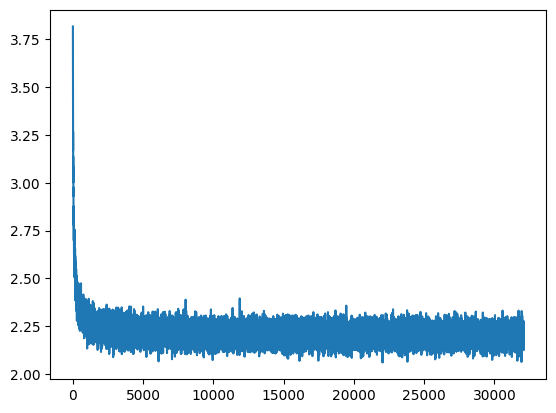

In [20]:
plot(losses.loss)